In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from pandarallel import pandarallel

In [4]:
pandarallel.initialize()

INFO: Pandarallel will run on 56 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [5]:
df = pd.read_csv('../data/df_tm_50_sentiment_hsd_entities_rel.csv', index_col='id') 

/home/yiyi/miniconda3/envs/migr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (0,2,11,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,author_id,conversation_id,text,id.1,created_at,lang,long,lat,hashtags,user_mentions,...,entity_24,entity_25,entity_26,entity_27,entity_28,entity_29,prim_topic,top_topics,top3,relevant
id,,,,,,,,,,,,,,,,,,,,,
840100706048602112,1.951021e+07,840100706048602112,"""#Europe plays a pivotal role in the developme...",8.401007e+17,2017-03-10T07:23:11.000Z,en,7.006937,50.960705,"['Europe', 'DigitalEconomy']",['FedEx'],...,NaN,NaN,NaN,NaN,NaN,NaN,29,"[29, 0, 33, 35, 12, 46, 4, 9, 21, 39]","[29, 0, 33]",True
1163476000795254784,9.280445e+07,1163273250140577792,@GiletsJaunesUK @anncaswell2 Is it any surpris...,1.163476e+18,2019-08-19T15:41:09.000Z,en,NaN,NaN,NaN,"['GiletsJaunesUK', 'anncaswell2']",...,NaN,NaN,NaN,NaN,NaN,NaN,25,"[25, 27, 32, 38, 23, 29, 44, 13, 48, 36]","[25, 27, 32]",False
406076853183852544,3.737547e+08,406076853183852544,Nick Clegg's scapegoating of immigrants is his...,4.060769e+17,2013-11-28T15:07:20.000Z,en,-2.175698,53.499957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31,"[31, 26, 19, 20, 30, 48, 2, 0, 33, 32]","[31, 26, 19]",False
1107975052677578752,5.324331e+08,1107975052677578752,"You are us, the migrant doctors, midwives,tea...",1.107975e+18,2019-03-19T12:00:12.000Z,en,NaN,NaN,NaN,"['bbclaurak', 'KenLoachSixteen', 'LeftUnityUK']",...,NaN,NaN,NaN,NaN,NaN,NaN,36,"[36, 5, 10, 33, 35, 47, 41, 20, 43, 2]","[36, 5, 10]",True
469489878972268545,1.316819e+09,469489878972268545,Think my #asylum12 convention hi is finally wa...,4.694899e+17,2014-05-22T14:48:04.000Z,en,-2.898172,53.198954,['asylum12'],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20,"[20, 3, 23, 35, 44, 29, 8, 25, 41, 18]","[20, 3, 23]",True


In [7]:
len(df)

397423

In [8]:
df.dropna(subset=['created_at'], inplace=True)

In [9]:
df.dropna(subset=['country_code'], inplace=True)

In [10]:
len(df)

397339

In [11]:
df['Year']= [int(x) for x in df['created_at'].str.slice(stop=4)]

In [73]:
df.columns

Index(['author_id', 'conversation_id', 'text', 'id.1', 'created_at', 'lang',
       'long', 'lat', 'hashtags', 'user_mentions', 'reply_count', 'like_count',
       'retweet_count', 'full_name', 'name', 'country', 'geo', 'country_code',
       'preprocessed_text', 'non_empty_data_tm', 'text_processed', 'sentiment',
       'pred_sentiment', 'hatespeech_pred', 'entity_0', 'entity_1', 'entity_2',
       'entity_3', 'entity_4', 'entity_5', 'entity_6', 'entity_7', 'entity_8',
       'entity_9', 'entity_10', 'entity_11', 'entity_12', 'entity_13',
       'entity_14', 'entity_15', 'entity_16', 'entity_17', 'entity_18',
       'entity_19', 'entity_20', 'entity_21', 'entity_22', 'entity_23',
       'entity_24', 'entity_25', 'entity_26', 'entity_27', 'entity_28',
       'entity_29', 'prim_topic', 'top_topics', 'top3', 'relevant', 'year'],
      dtype='object')

In [74]:
df.pred_sentiment

id
840100706048602112     2
1163476000795254784    1
406076853183852544     0
1107975052677578752    1
469489878972268545     0
                      ..
1379443768202567685    1
314516312133087233     1
1225113863475036161    2
386406029153808384     1
482779526640852992     2
Name: pred_sentiment, Length: 397339, dtype: int64

In [12]:
def senti2word(x):
    if x==2:
        return "positive"
    if x==1:
        return "neutral"
    if x==0:
        return "negative"

In [13]:
df['sentiment']= df['pred_sentiment'].parallel_apply(senti2word)

In [14]:
def hate2word(x):
    if x==2:
        return "hatespeech"
    if x==1:
        return "offensive"
    if x==0:
        return "normal"

In [15]:
df['hatespeech_label']= df['hatespeech_pred'].parallel_apply(hate2word)

In [17]:
df.to_csv('../data/df_tm_50_sentiment_hsd_entities_rel.csv')

In [16]:
df_rel = df[df['relevant']==True]

In [128]:
df_rel = df_rel.sample(frac=1)

In [119]:
df_rel.sentiment

id
327892384010600448      neutral
1302173955755831296     neutral
605647666769498112      neutral
538328483047690240      neutral
1112257918861299714     neutral
                         ...   
1255553715613958147     neutral
1165251580008042496     neutral
620615182289666048      neutral
1397686248869871619    positive
490463875280936961      neutral
Name: sentiment, Length: 279081, dtype: object

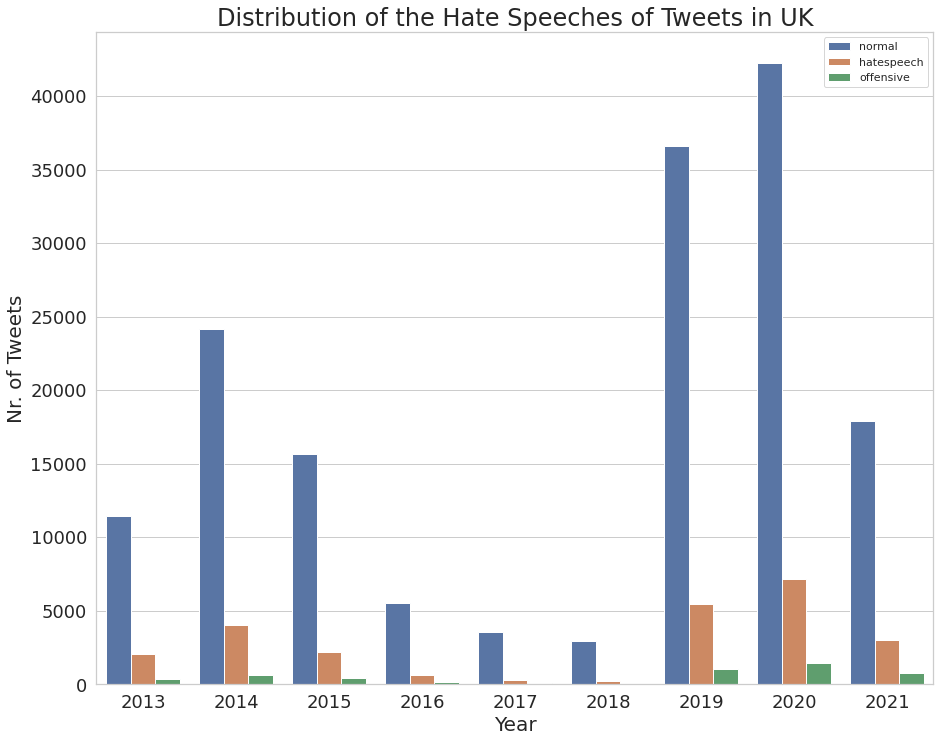

In [124]:
plot_dist(df_rel[df_rel['country_code']=='GB'], 'Distribution of the Hate Speeches of Tweets in UK', '../images/dist_hsd_uk.png', hue='hatespeech_label')

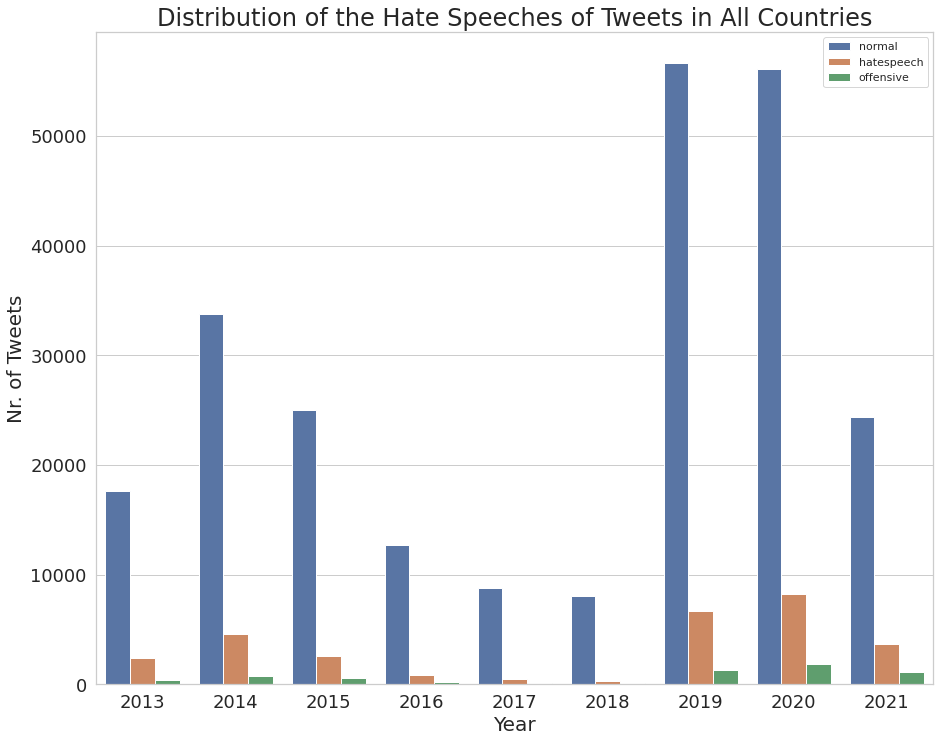

In [125]:
plot_dist(df_rel, 'Distribution of the Hate Speeches of Tweets in All Countries', '../images/dist_hsd_all.png', hue="hatespeech_label")

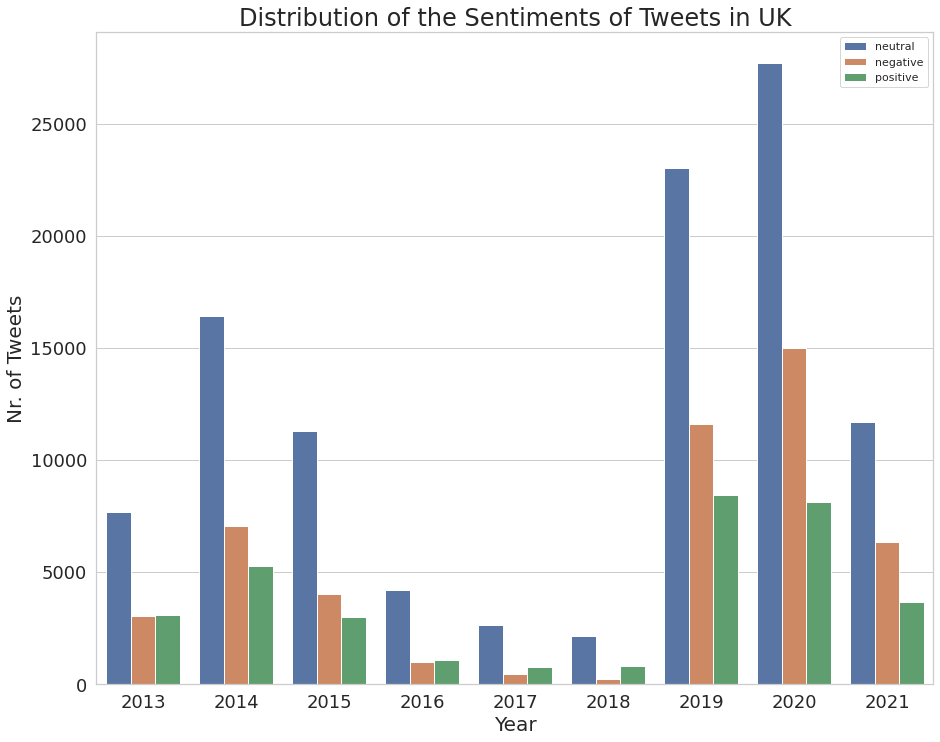

In [130]:
plot_dist(df_rel[df_rel['country_code']=='GB'], 'Distribution of the Sentiments of Tweets in UK', '../images/dist_sentiment_uk.png')

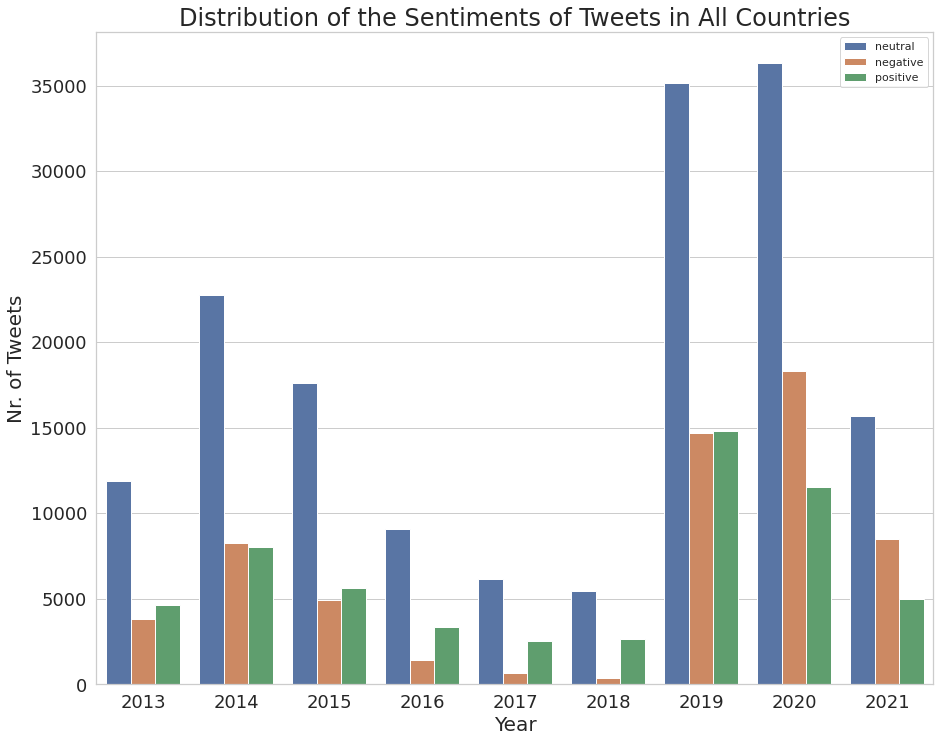

In [129]:
plot_dist(df_rel, 'Distribution of the Sentiments of Tweets in All Countries', '../images/dist_sentiment_all.png')

In [ ]:
# # 

In [95]:
def plot_dist(df,title, save_path, hue='sentiment'):
    sns.set_theme(style='whitegrid')
    plt.figure(figsize=(15,12))
    g= sns.countplot(x="year", hue=hue, data=df)
    plt.legend(loc='upper right')
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Nr. of Tweets', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(title, fontsize=24)
    plt.savefig(save_path)

In [38]:
# country_codes = list(set(df['country_code'].tolist()))

In [37]:
country_codes = ['PL', 'IT', 'FR', 'AT', 'HU', 'SE', 'CH', 'NL', 'ES', 'DE']

In [59]:
df_rel = df[df['relevant']==True]

In [61]:
len(df_rel)

279081

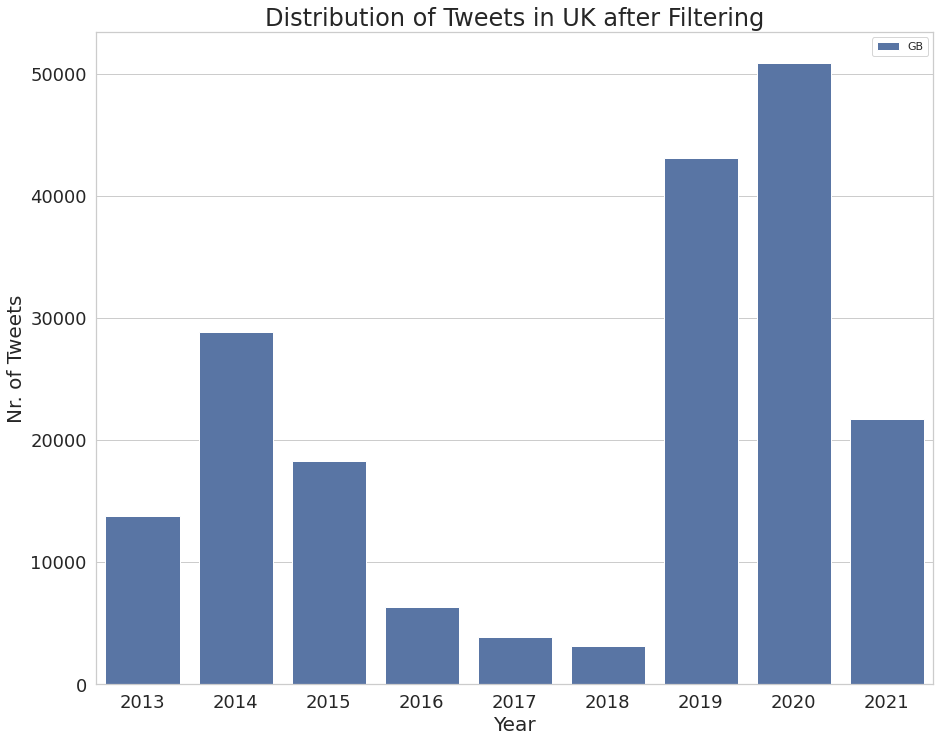

In [69]:
plot_dist(df_rel[df_rel['country_code']=='GB'], 'Distribution of Tweets in UK after Filtering', '../images/dist_all_filtered_uk.png')

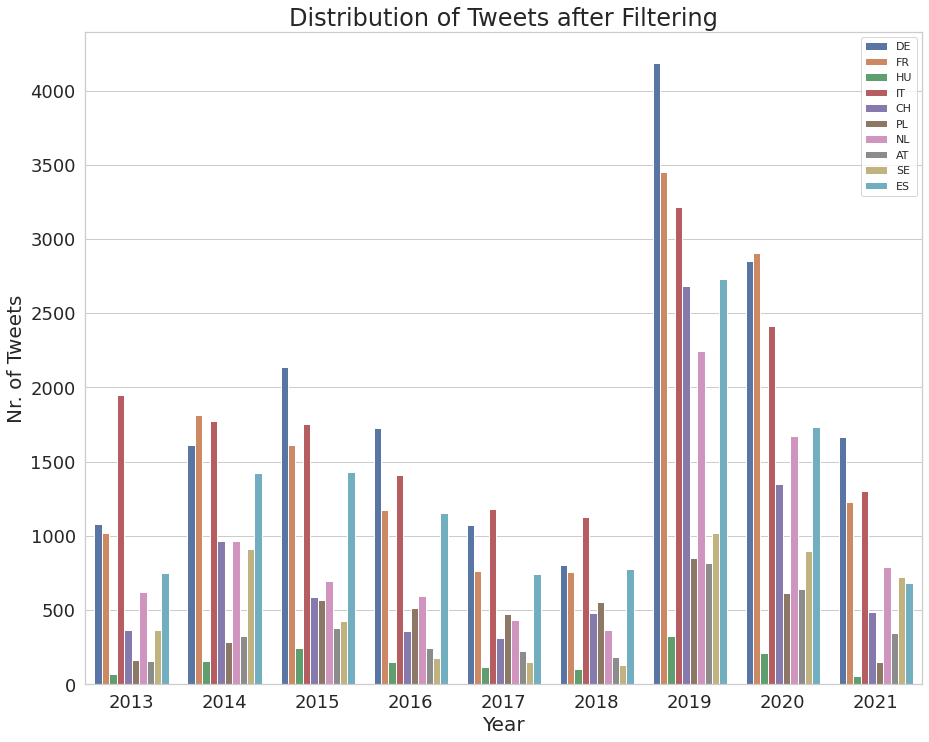

In [70]:
plot_dist(df_rel[df_rel['country_code'].isin(country_codes)], 'Distribution of Tweets after Filtering', '../images/dist_all_filtered.png')

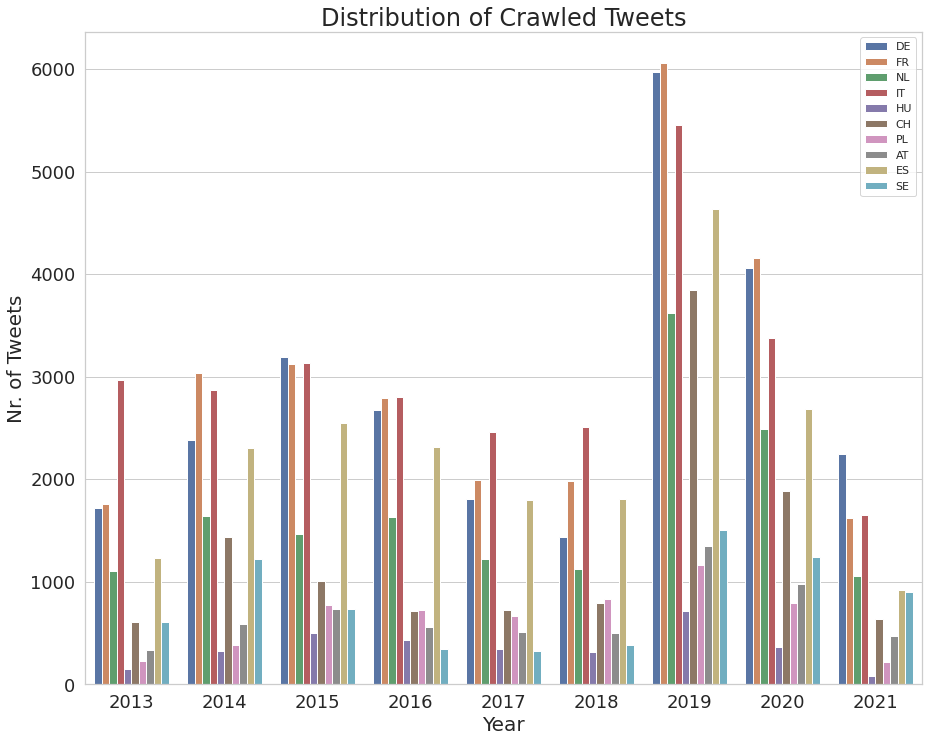

In [71]:
plot_dist(df[df['country_code'].isin(country_codes)], 'Distribution of Crawled Tweets', '../images/dist_all_crawled.png')

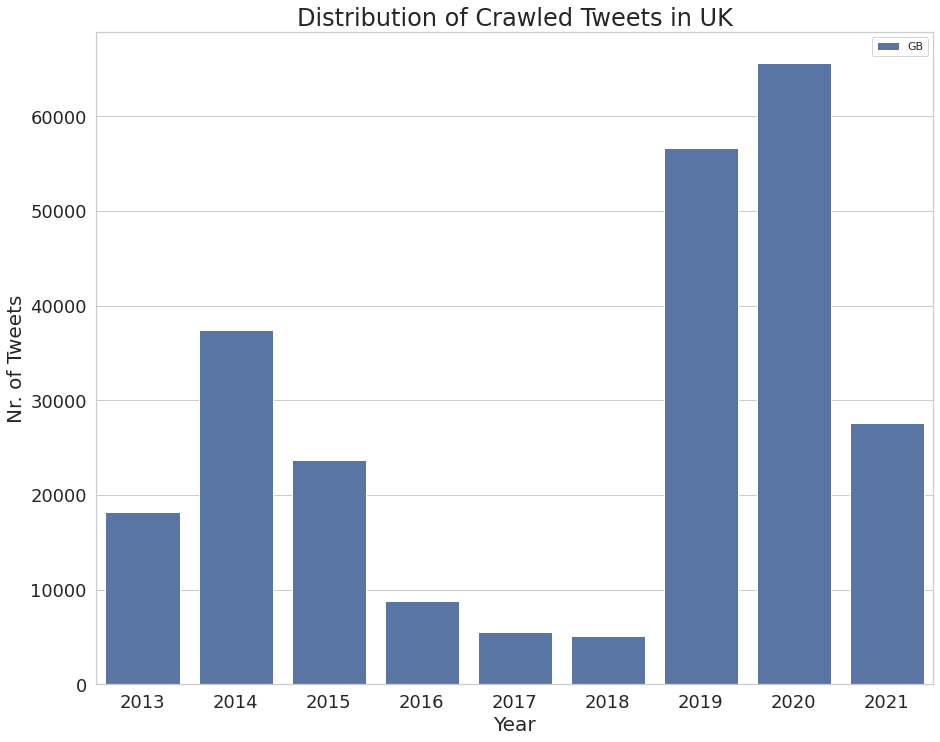

In [72]:
plot_dist(df[df['country_code']=='GB'], 'Distribution of Crawled Tweets in UK', '../images/dist_uk_crawled.png')